**Arima**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [68]:
# generamos una lista de 110 años para nuestre serie temporal 
años = np.arange(1821, 1931)

# la cantidad de pieles de linces captadas cada año

Pieles = [
269, 321, 585, 871, 1475, 2821, 3928, 5943, 4950, 2577,
523, 98, 184, 279, 409, 2285, 2685, 3409, 1824, 409,
151, 45, 68, 213, 546, 1033, 2129, 2536, 957, 361,
377, 225, 360, 731, 1638, 2725, 2871, 2119, 684, 299,
236, 245, 552, 1623, 3311, 6721, 4254, 687, 255, 473,
358, 784, 1594, 1676, 2251, 1426, 756, 299, 201, 229,
469, 736, 2042, 2811, 4431, 2511, 389, 73, 39, 49,
59, 188, 377, 1292, 4031, 3495, 587, 105, 387, 758,
1307, 3465, 6991, 6313, 3794, 1836, 345, 382, 808, 1388,
2713, 3800, 3091, 2985, 790, 674, 81, 80, 108, 229,
1132, 2432, 3574, 2935, 1537, 529, 485, 662, 1000, 1590
]

In [69]:
matrix={'Año':años,'Pieles':Pieles}
df=pd.DataFrame(matrix)
df

,Año,Pieles
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475
...,...,...
105,1926,529
106,1927,485
107,1928,662
108,1929,1000


Ventajas del Proceso
* **Transformación Logarítmica**: Ayuda a estabilizar la varianza y a manejar la no linealidad en los datos.
* **Diferenciación**: Ayuda a eliminar la tendencia y a hacer que la serie temporal sea más estacionaria, lo cual es esencial para la aplicabilidad de muchos modelos de series temporales como ARIMA.
* **Manejo de Fechas y Nulos**: Convertir la columna de fechas y manejar los valores nulos asegura que los datos estén limpios y en el formato correcto para análisis posteriores.

In [70]:
df["Pieles_log"] = df["Pieles"].apply(np.log)
df['Pieles_log_diff']=df['Pieles_log'].diff()
df['Año']=pd.to_datetime(df['Año'],format='%Y')
df.set_index('Año',inplace=True)
df.dropna(inplace=True,axis='rows')
df.head()

,Pieles,Pieles_log,Pieles_log_diff
Año,,,
1822-01-01,321,5.771441,0.176730
1823-01-01,585,6.371612,0.600171
1824-01-01,871,6.769642,0.398030
1825-01-01,1475,7.296413,0.526771
1826-01-01,2821,7.944847,0.648433


In [71]:
for z,i in enumerate(df.columns):
    print(z)

0
1
2


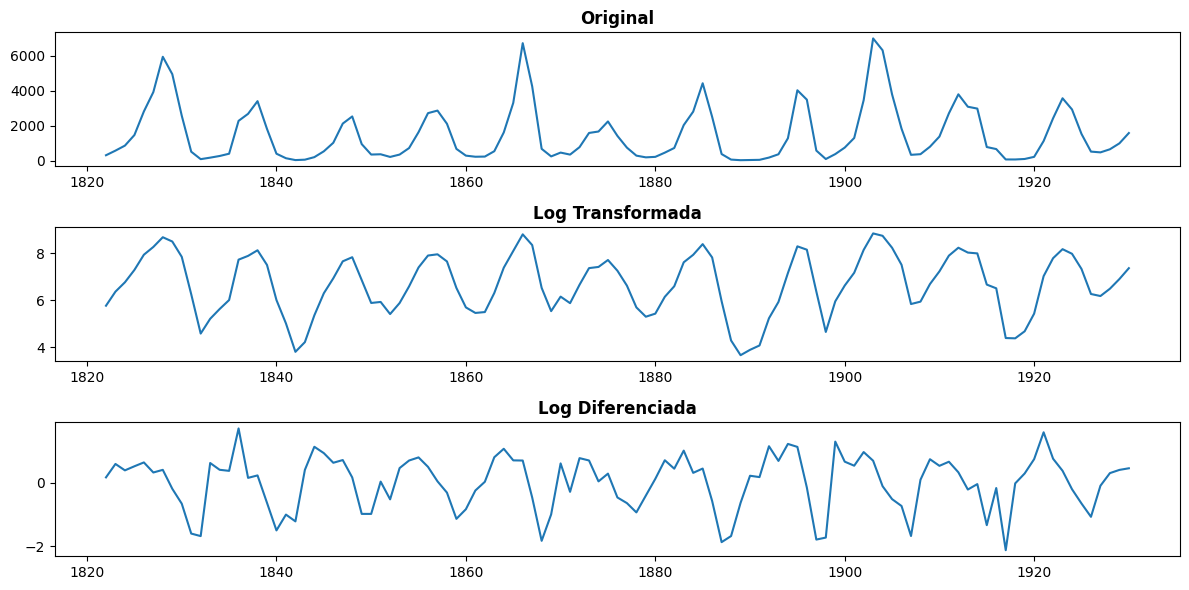

In [72]:
# Visualizar los datos originales y transformados
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Pieles'], label='Original')
plt.title('Original',fontsize=12,weight='bold')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['Pieles_log'], label='Log Transformada')
plt.title('Log Transformada',fontsize=12,weight='bold')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['Pieles_log_diff'], label='Log Diferenciada')
plt.title('Log Diferenciada',fontsize=12,weight='bold')

plt.tight_layout()
plt.show()

In [73]:
x=df.index
y=df['Pieles']
y_media=[np.mean(y) for _ in y]

y_log=df['Pieles_log']
y_log_media=[np.mean(y_log) for _ in y_log]

y_log_diff=df['Pieles_log_diff']
y_log_diff_mean=[np.mean(y_log_diff) for _ in y_log_diff]

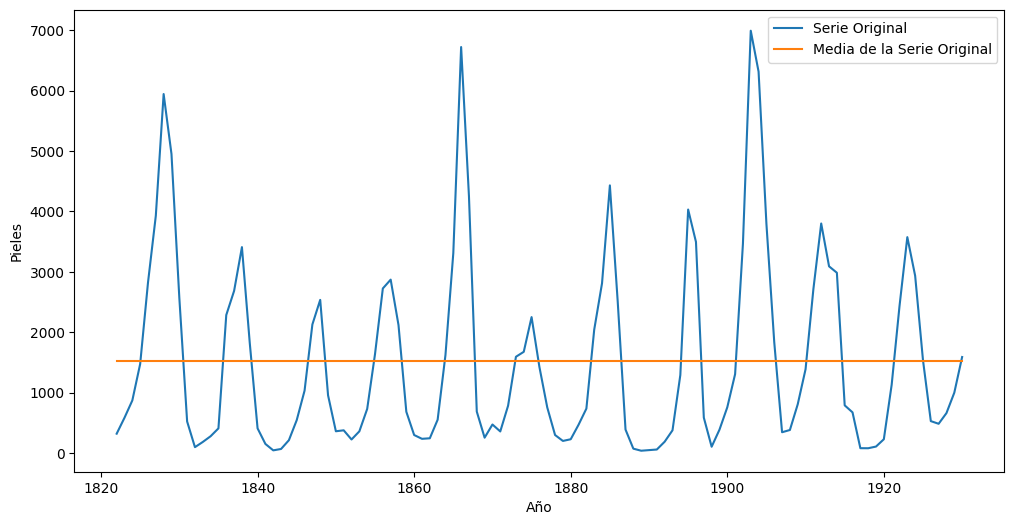

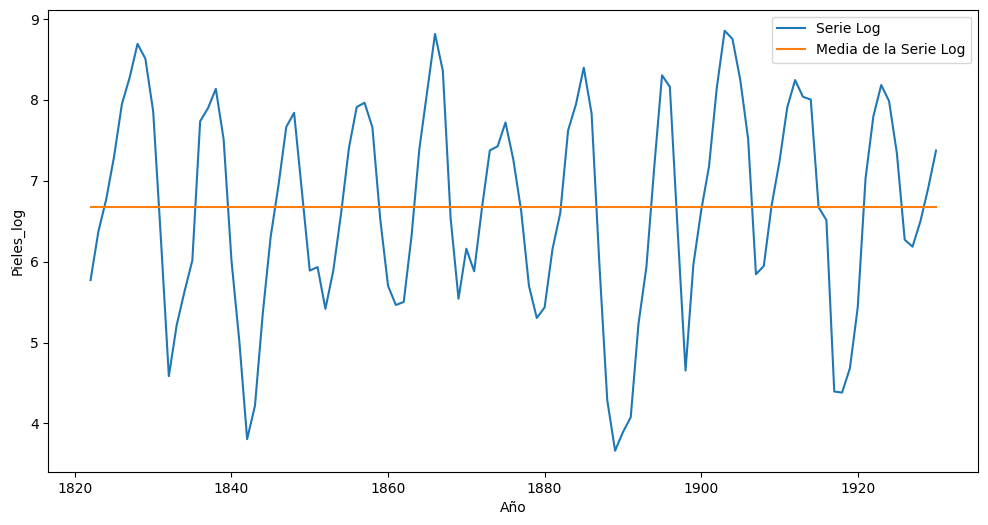

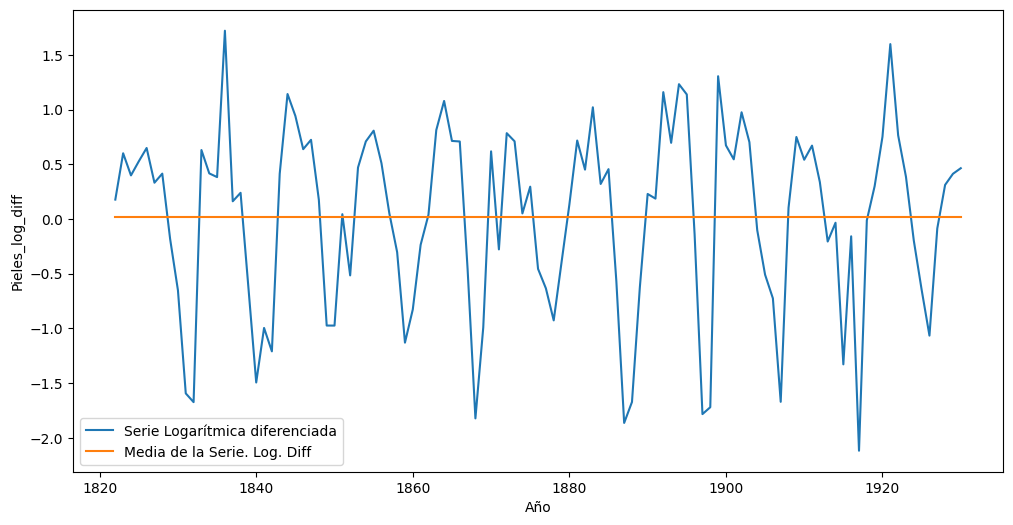

In [74]:
plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=y,label='Serie Original')
sns.lineplot(x=x, y=y_media, label = "Media de la Serie Original")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=y_log,label='Serie Log')
sns.lineplot(x=x, y=y_log_media, label = "Media de la Serie Log")
plt.show()


plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=y_log_diff,label='Serie Logarítmica diferenciada')
sns.lineplot(x=x, y=y_log_diff_mean, label = "Media de la Serie. Log. Diff")
plt.show()

In [75]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [76]:
df

,Pieles,Pieles_log,Pieles_log_diff
Año,,,
1822-01-01,321,5.771441,0.176730
1823-01-01,585,6.371612,0.600171
1824-01-01,871,6.769642,0.398030
1825-01-01,1475,7.296413,0.526771
1826-01-01,2821,7.944847,0.648433
...,...,...,...
1926-01-01,529,6.270988,-1.066599
1927-01-01,485,6.184149,-0.086840
1928-01-01,662,6.495266,0.311117


In [77]:
Prueba_Dickey_Fuller(df['Pieles'],'Pieles')
Prueba_Dickey_Fuller(df['Pieles_log'],'Pieles_log')
Prueba_Dickey_Fuller(df['Pieles_log_diff'],'Pieles_log_diff')

Resultados de la prueba de Dickey-Fuller para columna: Pieles
Test Statistic                         -3.079347
p-value                                 0.028120
No Lags Used                            7.000000
Número de observaciones utilizadas    101.000000
Critical Value (1%)                    -3.496818
Critical Value (5%)                    -2.890611
Critical Value (10%)                   -2.582277
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios
Resultados de la prueba de Dickey-Fuller para columna: Pieles_log
Test Statistic                        -3.649356
p-value                                0.004885
No Lags Used                          10.000000
Número de observaciones utilizadas    98.000000
Critical Value (1%)                   -3.498910
Critical Value (5%)                   -2.891516
Critical Value (10%)                  -2.582760
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios
Resultados de la pr

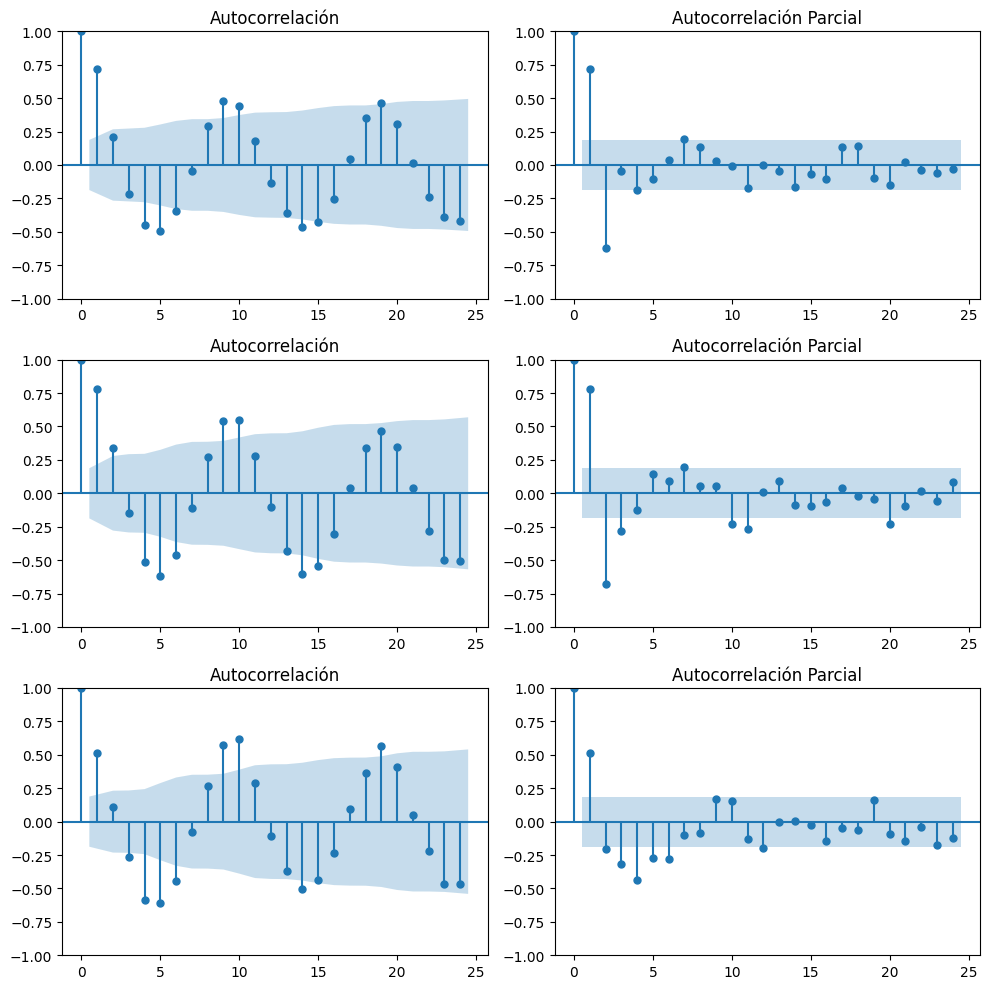

In [78]:
LAGS = 24

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6)) = fig.subplots(3, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log, ax = ax3, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log, ax = ax4, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log_diff, ax = ax5, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log_diff, ax = ax6, lags = LAGS, title = "Autocorrelación Parcial")

fig.tight_layout()

## **Separación Train & Test**

In [79]:
serie_predecir=y_log
y_index=serie_predecir.index
date_train=int(len(y_index)*0.8)
y_train=serie_predecir[y_index[:date_train]]
y_test=serie_predecir[y_index[date_train:len(y_index)]]
y_train.tail()

Año
1904-01-01    8.750366
1905-01-01    8.241176
1906-01-01    7.515345
1907-01-01    5.843544
1908-01-01    5.945421
Name: Pieles_log, dtype: float64

In [80]:
y_test.head()

Año
1909-01-01    6.694562
1910-01-01    7.235619
1911-01-01    7.905810
1912-01-01    8.242756
1913-01-01    8.036250
Name: Pieles_log, dtype: float64

In [89]:
# Para hacer el gridsearch, vamos a calcular los posibles valores que vamos a pasarle al modelo.
p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))
# Los dejamos a cero para sólo analizar un modelo ARIMA.
seasonal_pdq = [(0, 0, 0, 0)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 0)
SARIMAX: (0, 0, 3) x (0, 0, 0, 0)


In [90]:
st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:575.3135803994669
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:459.5121561334871
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:374.91744971739763
ARIMA(0, 0, 3)x(0, 0, 0, 0)12 - AIC:309.55560673324163
ARIMA(0, 0, 4)x(0, 0, 0, 0)12 - AIC:278.6957718221037
ARIMA(0, 0, 5)x(0, 0, 0, 0)12 - AIC:241.4719033751923
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:217.94089596100753
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:186.37756347987084
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:186.43126396758595
ARIMA(0, 1, 3)x(0, 0, 0, 0)12 - AIC:184.69354813113569
ARIMA(0, 1, 4)x(0, 0, 0, 0)12 - AIC:166.01507277187198
ARIMA(0, 1, 5)x(0, 0, 0, 0)12 - AIC:161.42652629390247
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:211.1109155513053
ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:211.5484055215503
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:189.1203620170353
ARIMA(0, 2, 3)x(0, 0, 0, 0)12 - AIC:189.23341278357955
ARIMA(0, 2, 4)x(0, 0, 0, 0)12 - AIC:184.238529030939
ARIMA(0, 2, 5)x(0, 0, 0, 0)12 - AIC:172.47060362958908
ARIMA(0, 3, 0)x(0, 

In [91]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (3, 1, 4), 
Con un AIC de 130.10661563575314


In [92]:
# Entrenamos el modelo con los mejores parametros.

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = best_params,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

# **Interpretación del mejor modelo**

In [93]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1073      0.179      6.182      0.000       0.756       1.458
ar.L2         -0.2681      0.282     -0.950      0.342      -0.821       0.285
ar.L3         -0.4634      0.181     -2.557      0.011      -0.819      -0.108
ma.L1         -1.0618      3.797     -0.280      0.780      -8.504       6.381
ma.L2         -0.1442      3.014     -0.048      0.962      -6.051       5.763
ma.L3          1.0863      3.916      0.277      0.781      -6.590       8.762
ma.L4         -0.3854      1.864     -0.207      0.836      -4.038       3.268
sigma2         0.2188      1.100      0.199      0.842      -1.938       2.375


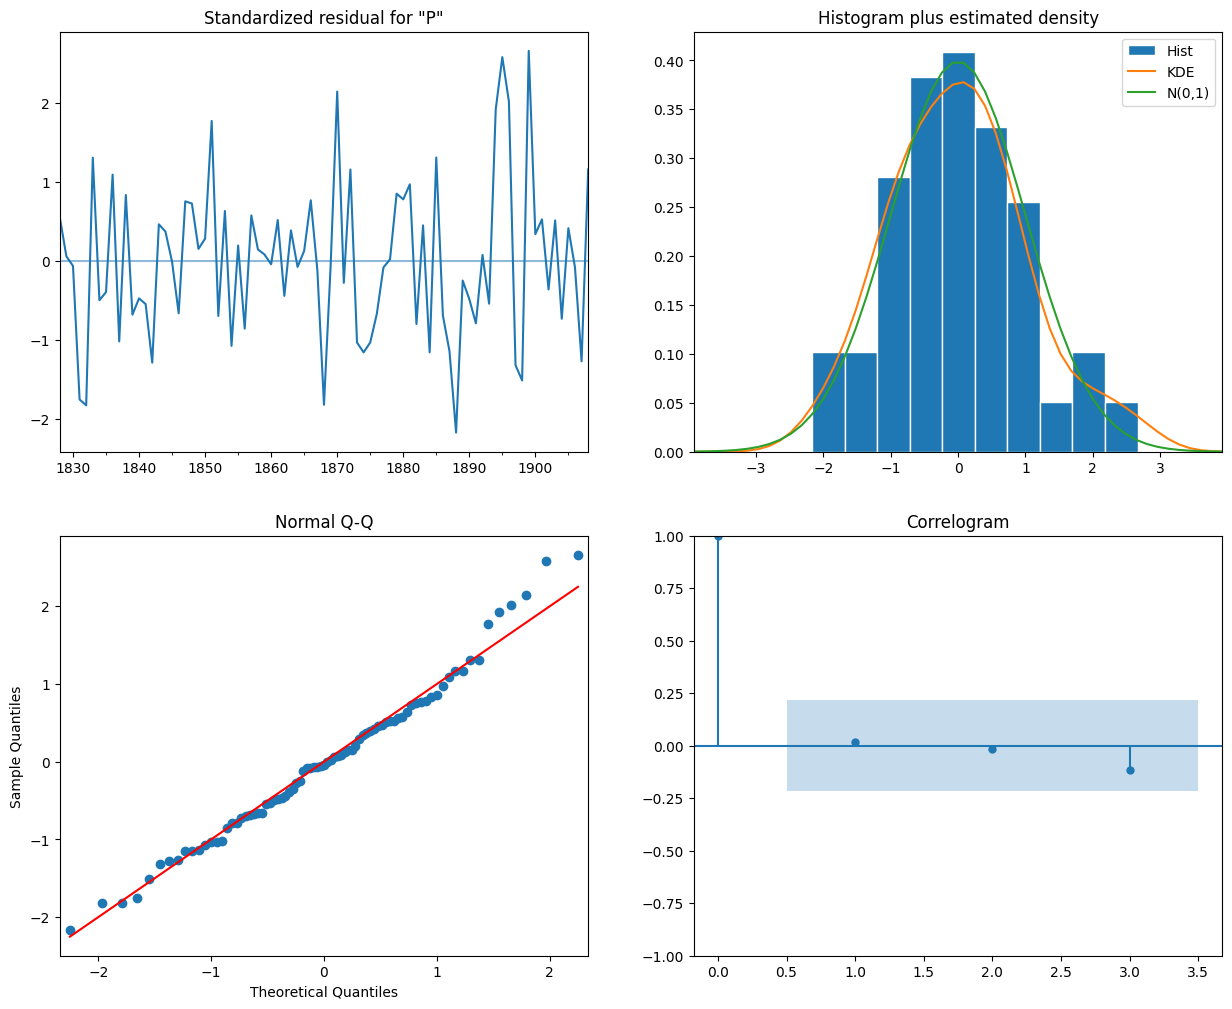

In [94]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

## **Predicción utilizando el modelo**

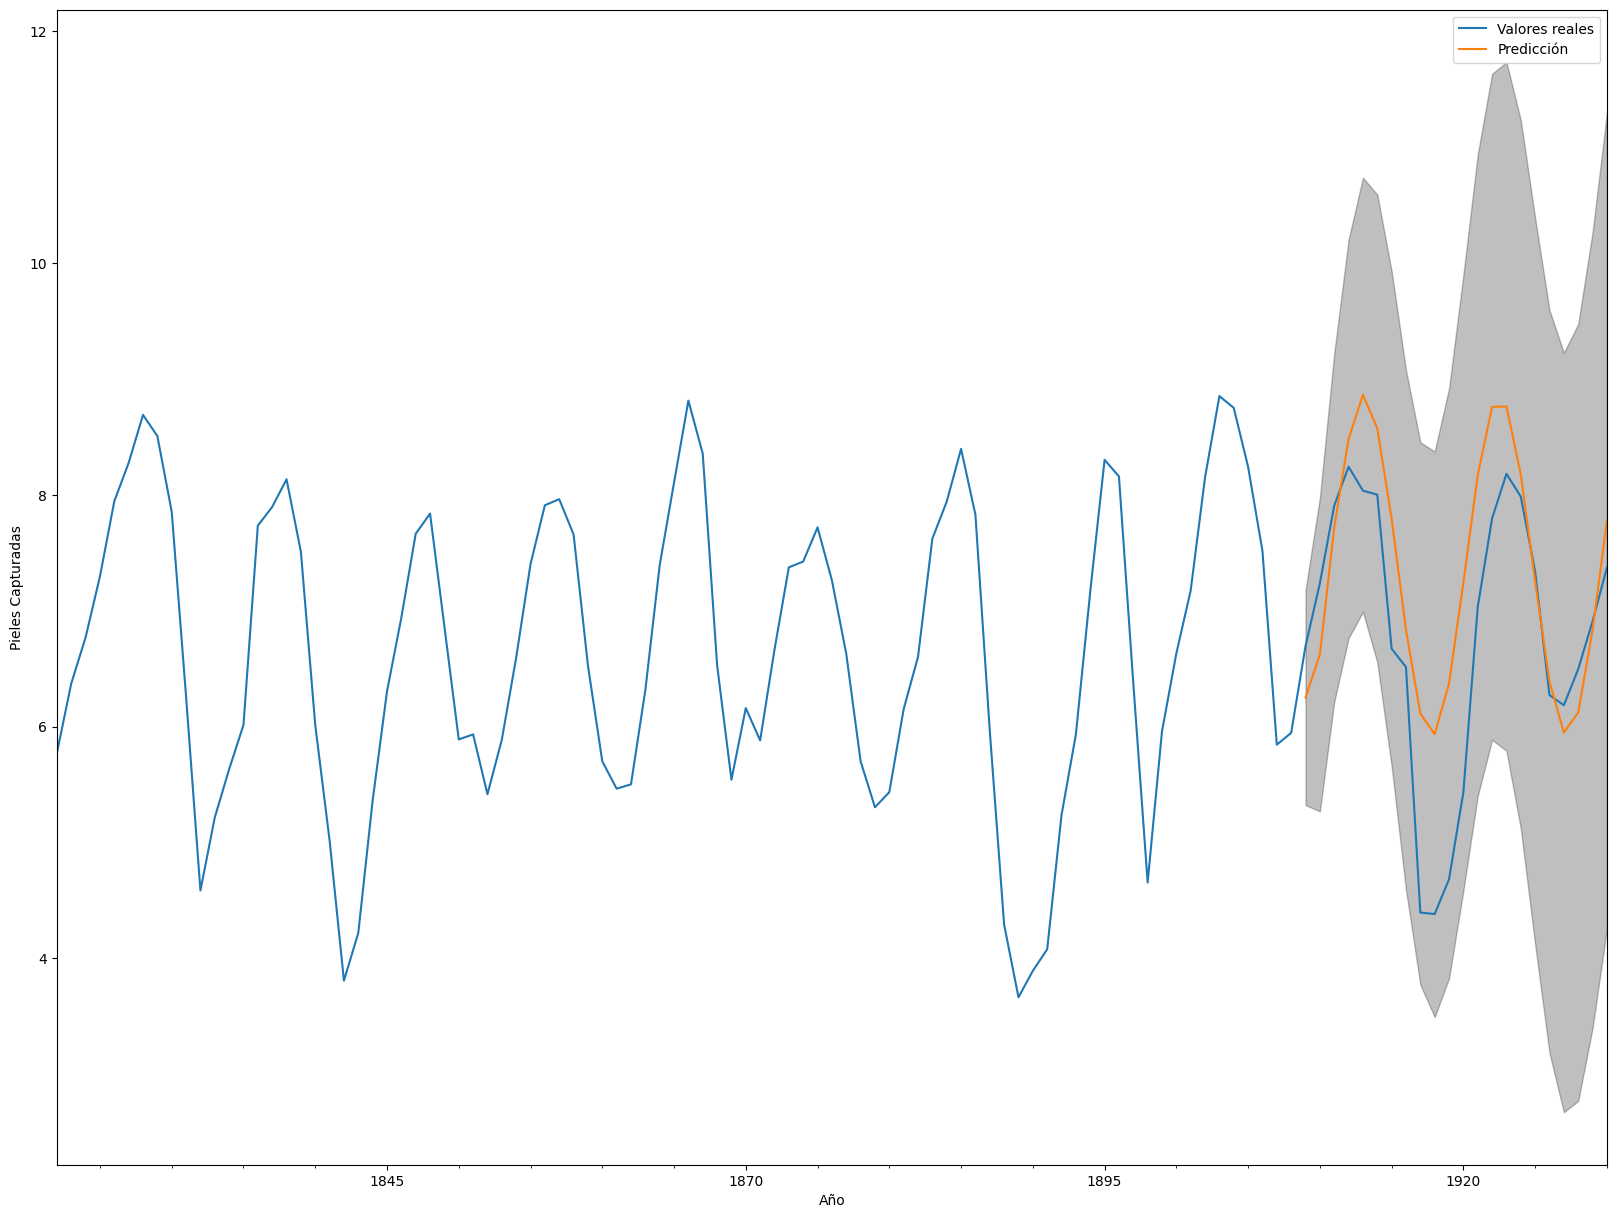

In [95]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = results.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

ax = serie_predecir.plot(label = 'Valores reales', figsize = (20, 15))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Año')
ax.set_ylabel('Pieles Capturadas')

plt.legend()
plt.show()